In [1]:
from utils.dawnfrb import FRBInfo

In [2]:
catalog = FRBInfo(
    '/home/jovyan/work/chime_data/21.0007/',
    '/home/jovyan/work/chime_data/23.0004/',
    remove_duplicates=True
)

In [4]:
catalog.catalog.columns

Index(['tns_name', 'previous_name', 'repeater_name', 'ra', 'ra_err',
       'ra_notes', 'dec', 'dec_err', 'dec_notes', 'gl', 'gb', 'exp_up',
       'exp_up_err', 'exp_up_notes', 'exp_low', 'exp_low_err', 'exp_low_notes',
       'bonsai_snr', 'bonsai_dm', 'low_ft_68', 'up_ft_68', 'low_ft_95',
       'up_ft_95', 'snr_fitb', 'dm_fitb', 'dm_fitb_err', 'dm_exc_ne2001',
       'dm_exc_ymw16', 'bc_width', 'scat_time', 'scat_time_err', 'flux',
       'flux_err', 'flux_notes', 'fluence', 'fluence_err', 'fluence_notes',
       'sub_num', 'mjd_400', 'mjd_400_err', 'mjd_inf', 'mjd_inf_err',
       'width_fitb', 'width_fitb_err', 'sp_idx', 'sp_idx_err', 'sp_run',
       'sp_run_err', 'high_freq', 'low_freq', 'peak_freq', 'chi_sq', 'dof',
       'flag_frac', 'excluded_flag', 'catalog', 'ra_1', 'ra_1_err_low',
       'ra_1_err_up', 'ra_2', 'ra_2_err_low', 'ra_2_err_up', 'dec_1',
       'dec_1_err_low', 'dec_1_err_up', 'dec_2', 'dec_2_err_low',
       'dec_2_err_up', 'low_ft_90', 'up_ft_90', 'dm_exc_1

In [5]:
import numpy as np
np.diff(catalog['plot_time'][0])

array([0.98303999, 0.98303999, 0.98303999, 0.98303999, 0.98303999,
       0.98303999, 0.98303999, 0.98303999, 0.98303999, 0.98303999,
       0.98303999, 0.98303999, 0.98303999, 0.98303999, 0.98303999,
       0.98303999, 0.98303999, 0.98303999])

In [5]:
repeaters_df = catalog.catalog[catalog.catalog.repeater_name!='-9999']
nyr_df = catalog.catalog[catalog.catalog.repeater_name=='-9999']

In [6]:
len(repeaters_df),len(nyr_df)

(280, 466)

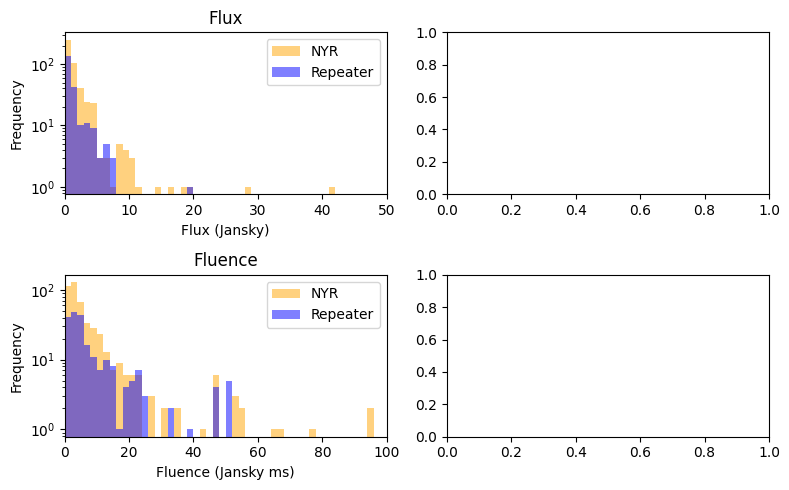

In [7]:
import matplotlib.pyplot as plt

# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# Plot histogram for 'flux' column in repeaters_df
axs[0, 0].hist(nyr_df['flux'], bins=50, range=(0,50), alpha=0.5, label='NYR', color='orange')
axs[0, 0].hist(repeaters_df['flux'], bins=50, range=(0,50), alpha=0.5, label='Repeater', color='blue')
axs[0, 0].set_title('Flux')
axs[0, 0].set_xlabel('Flux (Jansky)')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlim(0,50)
axs[0, 0].set_yscale('log')
axs[0, 0].legend()

# Plot histogram for 'fluence' column in nyr_df

# axs[0, 1].set_title('NYR Flux')
# axs[0, 1].set_xlabel('Flux (Jansky)')
# axs[0, 1].set_ylabel('Frequency')
# axs[0, 1].set_xlim(0,50)
# axs[0, 1].set_yscale('log')

# Plot histogram for 'flux' column in repeaters_df
axs[1, 0].hist(nyr_df['fluence'], bins=50, range=(0,100), alpha=0.5, label='NYR', color='orange')
axs[1, 0].hist(repeaters_df['fluence'], bins=50, range=(0,100), alpha=0.5, label='Repeater', color='blue')
axs[1, 0].set_title('Fluence')
axs[1, 0].set_xlabel('Fluence (Jansky ms)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_xlim(0,100)
axs[1, 0].set_yscale('log')
axs[1, 0].legend()

# Plot histogram for 'fluence' column in nyr_df
# axs[1, 1].set_title('NYR Fluence')
# axs[1, 1].set_xlabel('Fluence (Jansky ms)')
# axs[1, 1].set_ylabel('Frequency')
# axs[1, 1].set_xlim(0,100)
# axs[1, 1].set_yscale('log')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


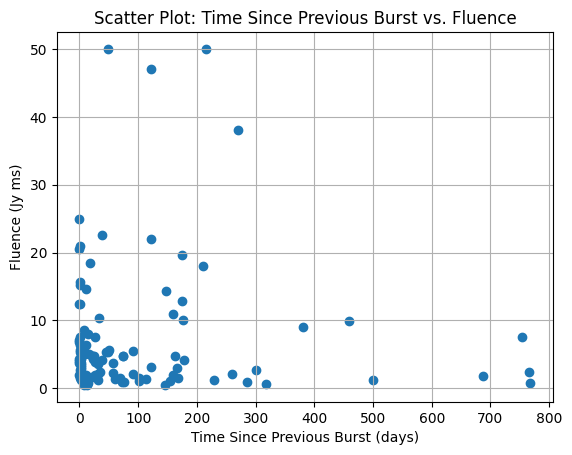

In [8]:
# Find the indices of rows with the maximum flux value for each group
max_flux_indices = repeaters_df.groupby(['tns_name', 'repeater_name'])['fluence'].idxmax()

# Filter the DataFrame to keep only the rows with the highest flux value for each group
filtered_repeaters_df = repeaters_df.loc[max_flux_indices]

# Now 'filtered_repeaters_df' contains only the rows with the highest flux value for each unique combination of 'tns_name' and 'repeater_name'


def calculate_time_since_previous_burst(row):
    mask = (filtered_repeaters_df['mjd_400'] < row['mjd_400']) & (filtered_repeaters_df['repeater_name'] == row['repeater_name']) & (filtered_repeaters_df['tns_name'] != row['tns_name'])
    previous_burst = filtered_repeaters_df.loc[mask]
    if not previous_burst.empty:
        time_since_previous_burst = row['mjd_400'] - previous_burst['mjd_400'].iloc[-1]
        return time_since_previous_burst, row['fluence']
    else:
        return None

result_list = filtered_repeaters_df.apply(lambda row: calculate_time_since_previous_burst(row), axis=1).tolist()
result_list = [pair for pair in result_list if pair is not None]

import matplotlib.pyplot as plt

x_values = [pair[0] for pair in result_list]
y_values = [pair[1] for pair in result_list]

plt.scatter(x_values, y_values, alpha=1)
plt.xlabel('Time Since Previous Burst (days)')
plt.ylabel('Fluence (Jy ms)')
plt.title('Scatter Plot: Time Since Previous Burst vs. Fluence')
plt.grid(True)

plt.show()

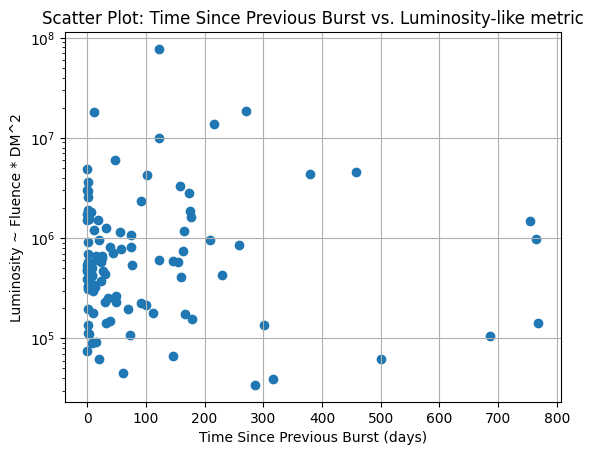

In [14]:
def calculate_time_since_previous_burst(row):
    mask = (filtered_repeaters_df['mjd_400'] < row['mjd_400']) & (filtered_repeaters_df['repeater_name'] == row['repeater_name']) & (filtered_repeaters_df['tns_name'] != row['tns_name'])
    previous_burst = filtered_repeaters_df.loc[mask]
    if not previous_burst.empty:
        time_since_previous_burst = row['mjd_400'] - previous_burst['mjd_400'].iloc[-1]
        luminosity_metric = row['fluence'] * (row['dm_fitb']**2)
        return time_since_previous_burst, luminosity_metric
    else:
        return None

result_list = filtered_repeaters_df.apply(lambda row: calculate_time_since_previous_burst(row), axis=1).tolist()
result_list = [pair for pair in result_list if pair is not None]

import matplotlib.pyplot as plt

x_values = [pair[0] for pair in result_list]
y_values = [pair[1] for pair in result_list]

plt.scatter(x_values, y_values, alpha=1)
plt.xlabel('Time Since Previous Burst (days)')
plt.ylabel('Luminosity ~ Fluence * DM^2')
plt.yscale('log')
plt.title('Scatter Plot: Time Since Previous Burst vs. Luminosity-like metric')
plt.grid(True)

plt.show()

In [7]:
import h5py
import numpy as np
def read_h5(filepath, attr):
    with h5py.File(filepath, 'r') as f:
        try:
            return f['frb'][attr][:]
        except KeyError:
            try:
                return f['frb'].attrs[attr]
            except KeyError:
                return None

In [8]:
import os
for fp in catalog.catalog['filepath'].values:
    a=read_h5(fp, 'calibrated_wfall')
    if a is not None:
        np.savez_compressed(f'/home/jovyan/work/chime_data/calibrated_wfalls/{os.path.basename(fp)}',cal_wfall=a)